# importance of influences factors
<br> I will use a random forest model to rank the importance of these demograohic and socia-ecnomic factors in terms of their impacts on people's happiness

## import lib

In [49]:
import pandas as pd
import numpy as np

#model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#memory
import gc
import dill
import io

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

## 1. load data
<br> missing value rows are removed
<br> 36 features and 1 response
<br> all features are numerical (float)

In [23]:
df=pd.read_csv('../data/df.csv')

In [24]:
df.head()

,state_county,sentiment,State,County,TotalPop,Men,Women,Hispanic,White,Black,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Code,frac_high_school_lower,frac_high_school,frac_college,frac_bachelor_or_higher
0,45001.0,0.075153,South Carolina,Abbeville County,24997.0,12308.0,12689.0,1.2,68.9,27.9,...,80.2,13.5,6.2,0.0,10.7,45001,21.9,37.5,28.3,12.3
1,22001.0,0.076139,Louisiana,Acadia Parish,62163.0,30023.0,32140.0,2.1,77.7,17.4,...,82.4,10.6,7.0,0.0,10.1,22001,26.2,39.2,24.1,10.5
2,51001.0,0.076547,Virginia,Accomack County,33115.0,16117.0,16998.0,8.8,60.9,28.6,...,73.2,18.6,7.7,0.5,6.8,51001,19.7,39.9,21.7,18.8
3,16001.0,0.080676,Idaho,Ada County,417501.0,208879.0,208622.0,7.6,85.5,1.1,...,77.2,15.8,6.9,0.1,6.6,16001,5.8,21.4,35.8,37.1
4,19001.0,0.244170,Iowa,Adair County,7426.0,3667.0,3759.0,1.5,97.2,0.4,...,73.6,15.6,10.6,0.1,3.2,19001,7.5,44.7,32.5,15.3


In [25]:
df.loc[df.isnull().apply(any,axis=1)]

,state_county,sentiment,State,County,TotalPop,Men,Women,Hispanic,White,Black,...,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Code,frac_high_school_lower,frac_high_school,frac_college,frac_bachelor_or_higher
36,18000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18000,12.2,34.6,29.1,24.1
37,21000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21000,15.8,33.6,28.2,22.3
38,22000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22000,16.6,33.9,26.9,22.5
40,27000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27000,7.6,26.1,32.7,33.7
41,29000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29000,11.6,31.3,30.0,27.1
43,46000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,46000,9.1,31.3,32.6,27.0
45,51000.0,0.078191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51000,11.7,24.8,27.2,36.3
128,24000.0,0.071675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24000,10.6,25.5,25.9,37.9
173,19000.0,0.068342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19000,8.5,32.2,32.6,26.7
175,39000.0,0.068342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,39000,10.9,34.1,28.9,26.1


limit_output extension: Maximum message size of 10000 exceeded with 29518 characters

In [29]:
df=df.loc[~df.isnull().apply(any,axis=1)]

In [30]:
df.columns

Index(['state_county', 'sentiment', 'State', 'County', 'TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'Code', 'frac_high_school_lower',
       'frac_high_school', 'frac_college', 'frac_bachelor_or_higher'],
      dtype='object')

In [31]:
col_to_keep=['sentiment','TotalPop', 'Men',
       'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific',
       'Citizen', 'Income', 'IncomePerCap', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment', 'frac_high_school_lower',
       'frac_high_school', 'frac_college', 'frac_bachelor_or_higher']

In [32]:
df=df[col_to_keep]

In [33]:
df.isnull().sum()

sentiment                  0
TotalPop                   0
Men                        0
Women                      0
Hispanic                   0
White                      0
Black                      0
Native                     0
Asian                      0
Pacific                    0
Citizen                    0
Income                     0
IncomePerCap               0
Poverty                    0
ChildPoverty               0
Professional               0
Service                    0
Office                     0
Construction               0
Production                 0
Drive                      0
Carpool                    0
Transit                    0
Walk                       0
OtherTransp                0
WorkAtHome                 0
MeanCommute                0
Employed                   0
PrivateWork                0
PublicWork                 0
SelfEmployed               0
FamilyWork                 0
Unemployment               0
frac_high_school_lower     0
frac_high_scho

## 2. model

### 2.1 a simple decision tree
<br> without tuning hyperparameters like max_depth
<br> used "explained variance" as the metric
<br> ran a k-fold cross validation
<br> estimated the train score as 1 and the test score as -1.18 +/- 0.32
<br> negative metric value means that the model does not work well on test data
<br> the model is severely overfitting
<br> thus we need to tune the hyperparameters to combat the overfitting problem

In [58]:
X = df[df.columns[1:]].values
y = df['sentiment'].values

In [60]:
dtr_no_tuning=DecisionTreeRegressor(max_depth=None)
kf = KFold(n_splits=10, shuffle=True, random_state=None)
train_score=[]
test_score=[]
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    dtr_no_tuning.fit(X_train,y_train)
    train_score.append(dtr_no_tuning.score(X_train,y_train))
    test_score.append(dtr_no_tuning.score(X_test,y_test))

print("Est. explained variance for training set: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score)))
print("Est. explained variance for test set: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score)))

Est. explained variance for training set: 1.00 (+/- 0.00)
Est. explained variance for test set: -1.18 (+/- 0.32)


In [ ]:
#scores_dtr_no_tuning = cross_val_score(dtr_no_tuning, X, y, cv=10,scoring='explained_variance') # 10-fold cross validation
#print('scores for k=10 fold validation:',scores_dtr_no_tuning)

In [61]:
dtr_no_tuning.fit(X,y)
y_pred=dtr_no_tuning.predict(X)

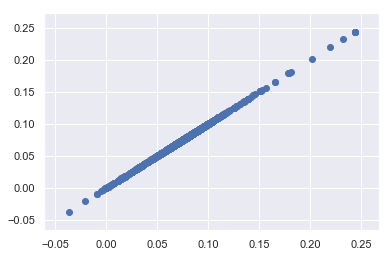

In [62]:
plt.scatter(y,y_pred)

(-0.001, 0.001)

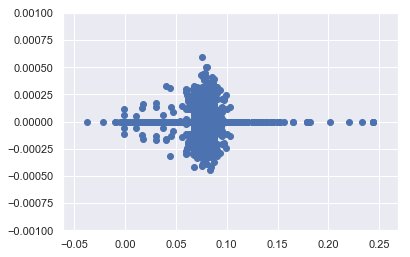

In [63]:
plt.scatter(y_pred,y_pred-y)
plt.ylim(-0.001,0.001)

### 2.2 a decision tree regressor with tuned hyperparameter
<br> only manupulated max_depth
<br> used GridSearchCV to find the best max_depth, which is 1
<br> the best decision tree regressor is a very weak learner
<br> both training and testing scores are 0.03
<br> severe underfitting
<br> indicating that the features are not adequate to predict happiness score

In [84]:
dtr_tuning=DecisionTreeRegressor(max_depth=10)
gc=GridSearchCV(dtr_tuning,
                param_grid={'max_depth':np.arange(1,20)},
                scoring='explained_variance',
                cv=20,
                verbose=1)
gc.fit(X,y)

Fitting 20 folds for each of 19 candidates, totalling 380 fits


[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:   20.7s finished


GridSearchCV(cv=20, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=1)

In [90]:
print(gc.best_params_)
print('test score is {}'.format(gc.best_score_))
print('train score is {}'.format(gc.best_estimator_.score(X,y)))

{'max_depth': 1}
test score is 0.03276417337627316
train score is 0.03643325737070924


In [80]:
y_pred=gc.best_estimator_.predict(X)

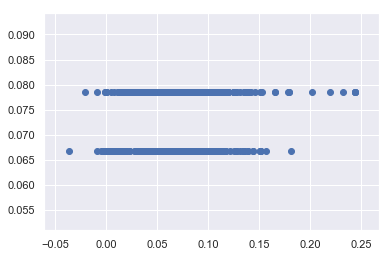

In [82]:
plt.scatter(y,y_pred)

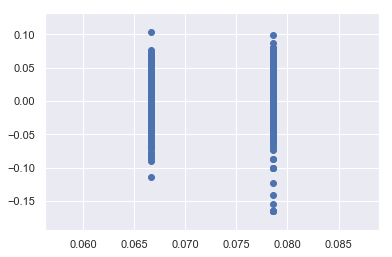

In [83]:
plt.scatter(y_pred,y_pred-y)

### 2.3 random forest
<br> still overfitting
<br> but overfitting problem is less severe compared with decision tree regressor since multiple trees are used

In [92]:
rfr_no_tuning=RandomForestRegressor(n_estimators=5)
kf = KFold(n_splits=10, shuffle=True, random_state=None)
train_score=[]
test_score=[]
for train_index,test_index in kf.split(X):
    X_train=X[train_index]
    X_test=X[test_index]
    y_train=y[train_index]
    y_test=y[test_index]
    rfr_no_tuning.fit(X_train,y_train)
    train_score.append(rfr_no_tuning.score(X_train,y_train))
    test_score.append(rfr_no_tuning.score(X_test,y_test))
    
print("Est. explained variance for training set: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score)))
print("Est. explained variance for test set: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score)))

Est. explained variance for training set: 0.73 (+/- 0.01)
Est. explained variance for test set: -0.25 (+/- 0.09)


In [93]:
rfr_no_tuning.fit(X,y)
t_pred=rfr_no_tuning.predict(X)

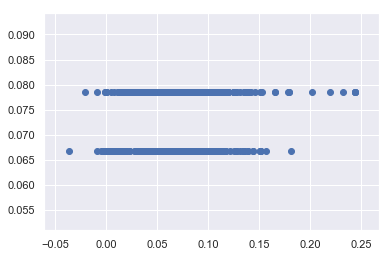

In [94]:
plt.scatter(y,y_pred)

### 2.4 random forest with tuned hyperparameters

In [100]:
rfr=RandomForestRegressor(n_estimators=5,max_depth=5)
gc=GridSearchCV(rfr,
               param_grid={'n_estimators':[5,10,15,25,35],'max_depth':[3,5,7,9,11,13]},
               scoring='explained_variance',
               cv=5,
               verbose=1)
gc.fit(X,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 25, 35], 'max_depth': [3, 5, 7, 9, 11, 13]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='explained_variance', verbose=1)

In [101]:
print(gc.best_params_)
print('test score is {}'.format(gc.best_score_))
print('train score is {}'.format(gc.best_estimator_.score(X,y)))

{'max_depth': 3, 'n_estimators': 35}
test score is 0.029151089526037673
train score is 0.10131965744193926


In [102]:
rfr.fit(X,y)
t_pred=rfr.predict(X)

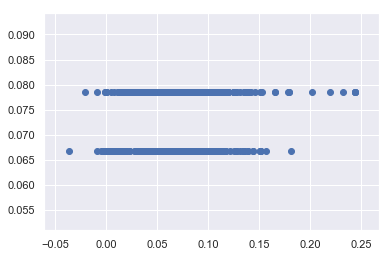

In [103]:
plt.scatter(y,y_pred)

### 2.5 interpretability
<br> top important features that influence people's happiness are population composition, employment rate, and the type they are employed/commute to work

In [110]:
df_importance=pd.DataFrame({'feature':df.columns[1:],'importance':gc.best_estimator_.feature_importances_})
df_importance.sort_values(by='importance',ascending=False).head(10)

,feature,importance
1,Men,0.139265
2,Women,0.115835
0,TotalPop,0.114328
9,Citizen,0.101687
26,Employed,0.078950
24,WorkAtHome,0.041842
31,Unemployment,0.032684
25,MeanCommute,0.027299
16,Office,0.026061
29,SelfEmployed,0.024876
